In [2]:
import alpaca_trade_api as alpaca_trade_api
import numpy as np
import pandas as pd
from scipy.signal import find_peaks,find_peaks_cwt
#import mplfinance as mpf
import matplotlib.pyplot as plt
import datetime as datetime 

In [3]:
api = alpaca_trade_api.REST(key_id='PK714C2Y2AKEKG1GJHAQ',
                            secret_key='NwgIb/ZhtYWvEyulzuv6BfWnQJk0iqmxSnO/snKv',
                            base_url='https://paper-api.alpaca.markets',
                            api_version='v2')  

def getArrayFromBars(symbol,days):
        try:
            bars = api.get_barset(symbol, timeframe='day', limit=days)
        except alpaca_trade_api.rest.APIError as e:
            print("Error in get_avg_price while getting bars- ", e)
        ls_o = bars[symbol]
        list_close = [elem.c for elem in ls_o]
        list_open =  [elem.o for elem in ls_o]
        list_high =  [elem.h for elem in ls_o]
        list_low =   [elem.l for elem in ls_o]
        list_date =  [elem.t for elem in ls_o]
        list_vol =  [elem.v for elem in ls_o]
        np_symbol = np.array([list_close,list_open,list_high,list_low,list_vol])
        idx = pd.DatetimeIndex(list_date)
        np_symbol = np_symbol.transpose()
        df_symbol = pd.DataFrame(np_symbol,index=idx, columns = ['Close','Open','High','Low','Volume'])

        return df_symbol

In [4]:
df_symbol_adobe = getArrayFromBars('ADBE',150)
df_symbol_autodesk = getArrayFromBars('ADSK',150)

In [5]:
df_symbol_adobe.head()

,Close,Open,High,Low,Volume
2019-06-21 00:00:00-04:00,299.28,301.11,304.000,299.090,3334695.0
2019-06-24 00:00:00-04:00,299.96,300.00,302.580,298.685,2509173.0
2019-06-25 00:00:00-04:00,287.97,299.21,300.645,287.000,4090227.0
2019-06-26 00:00:00-04:00,288.72,291.26,292.760,288.700,2249969.0
2019-06-27 00:00:00-04:00,293.14,290.04,294.670,290.040,1758629.0


In [6]:

np.corrcoef(df_symbol_adobe['Close'],df_symbol_autodesk['Close'])

array([[1.        , 0.94128244],
       [0.94128244, 1.        ]])

In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [9]:
X = df_symbol_adobe['Close'].values.reshape(-1,1)
y = df_symbol_autodesk['Close'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)


[-48.01912862]
[[0.70595725]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred = regressor.predict(X_test)

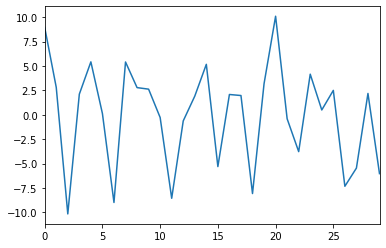

In [16]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
(df['Actual']-df['Predicted']).plot()

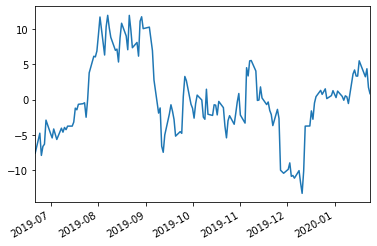

In [26]:
diff = (df_symbol_adobe['Close']*regressor.coef_[0])-df_symbol_autodesk['Close']+regressor.intercept_[0]
diff.plot()